In [5]:
setwd('/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts')
suppressPackageStartupMessages(library(beaveR))
suppressPackageStartupMessages(library(TreeSummarizedExperiment))
saveDir <- "/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts/environment/real_datasets/GSE100505/mode_gcbias=True/posttype=gibbs_npost=100_tf=100/comp_trees/DE"
load(file.path(saveDir, "tseCons.RData"))

In [7]:
treeCons <- rowTree(tseCons)
l <- length(treeCons$tip)

In [16]:
suppressPackageStartupMessages(library(DESeq2))
dds <- DESeqDataSet(tseCons[1:l,], design=~condition)
dds <- dds[rowSums(assays(dds)[["counts"]]) > 10,]
vsd <- vst(dds)

using counts and average transcript lengths from tximeta

using 'avgTxLength' from assays(dds), correcting for library size



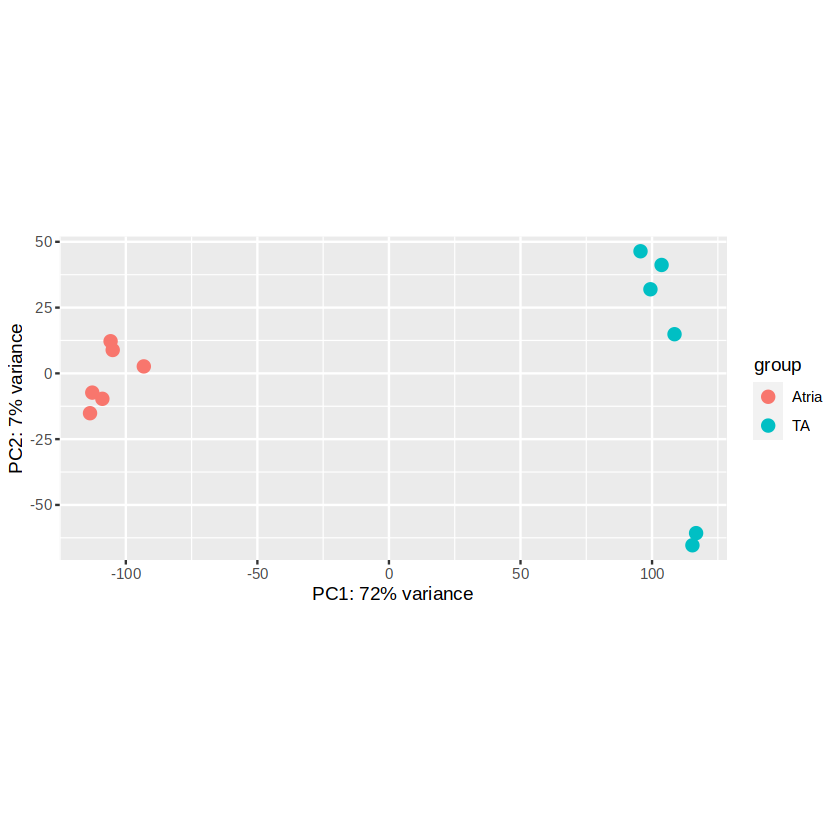

In [17]:
plotPCA(vsd, intgroup=c("condition"), ntop=1000)

In [19]:
y <- tseCons[1:l,]
y <- fishpond::scaleInfReps(y)
y <- labelKeep(y)
set.seed(1)
y <- swish(y, x = "condition")

In [9]:
load(file.path(saveDir, "tAfterBHMoreClimbMIRV.RData"))

In [31]:
sapply(tAfterBHMoreClimbMIRV[[1]], length)
sapply(tAfterBHMoreClimbMIRV[[2]], length)
sapply(tAfterBHMoreClimbMIRV[[3]], length)

[1] 15864 19453 21815

[1] 18307 22817 25761

[1] 18351 23024 26051

In [28]:
y <- labelKeep(y)
set.seed(1)
y <- swish(y, x = "condition")

In [30]:
sum(mcols(y)[["qvalue"]] < 0.01, na.rm=T)
sum(mcols(y)[["qvalue"]] < 0.05, na.rm=T)
sum(mcols(y)[["qvalue"]] < 0.1, na.rm=T)


[1] 18169

[1] 22894

[1] 26035

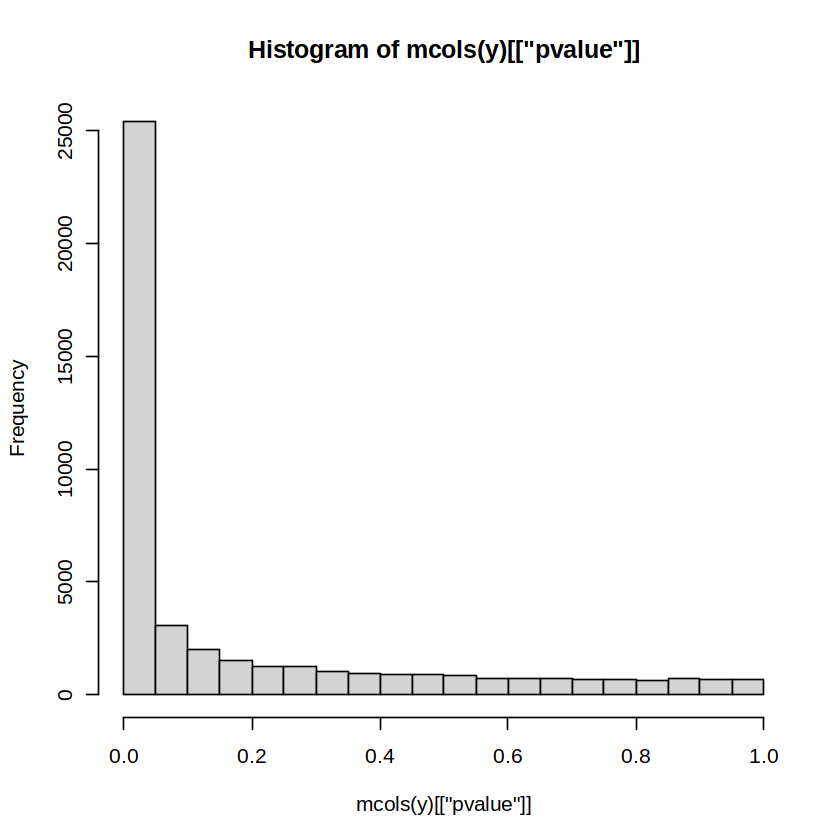

In [37]:
hist(mcols(y)[["pvalue"]])

In [36]:
?qvalue